# Data Analysis: Video Game Sales - Python / SQL Project

Welcome to my Video Game Sales Data Analysis Project! It is currently Sunday and I don't have much to do. So to rid myself of boredom, I decided to analyze random data. My friends and I are gamers, so I decided to analyze data on video games. In this project, I'll answer questions like "which consoles is the most successful", "which console is the most active", "which console is most successful in specific regions", and many more. Enjoy!

In [464]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### To start the project, I would first need to connect to the SQL database the houses the data I need

For potential employers --> Most of my SQL expertise is built on MySQL and MySQL Workbench. I started off using SQLite, but found MySQL / Workbench more comfortable. 

In [465]:
mydb = mysql.connector.connect(host="localhost",
                               user="root",
                               password="NonDucorDuco321",
                               database="vgsales"
)

print(mydb)

In [466]:
mycursor = mydb.cursor()

### Before starting the analysis, I want to display the dataframe for easy reference

In [467]:
mycursor.execute("SELECT * FROM vgsales")
myresult = mycursor.fetchall()
dataframe = pd.DataFrame(myresult)
dataframe.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Obviously the dataframe above is missing a key feature: The headers. Luckily the dataset (downloaded from Kaggle.com) supplies me with the headers and I can easily input them into the dataframe

In [468]:
dataframe.columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
                    'JP_Sales', 'Other_Sales', 'Global Sales']
dataframe.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Challenge 1: How recent / relevant is the dataset you are using?

It is important to know how relevant the dataset is. When presenting the analysis to a client, you would not want to use outdated or unreliable data, unless otherwise instructed to. 

In [469]:
mycursor.execute("SELECT * FROM vgsales ORDER BY Year DESC")
myresult = mycursor.fetchall()

chrono_desc = pd.DataFrame(myresult)
chrono_desc.columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
                    'JP_Sales', 'Other_Sales', 'Global Sales']
chrono_desc.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,14304,Metroid Prime: Federation Force,3DS,2016,Action,Nintendo,0.02,0.01,0.01,0.00,0.03
5,14309,Sonic Boom: Fire & Ice,3DS,2016,Platform,Sega,0.03,0.00,0.00,0.00,0.03
6,14316,Gakusen Toshi Asterisk Festa: Houka Kenran,PSV,2016,Fighting,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
7,14386,Hearts of Iron IV,PC,2016,Strategy,Paradox Interactive,0.00,0.03,0.00,0.00,0.03
8,14430,Summon Night 6: Lost Borders,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
9,14466,Atelier Shallie Plus: Alchemists of the Dusk Sea,PSV,2016,Role-Playing,Tecmo Koei,0.00,0.00,0.03,0.00,0.03


In [470]:
mycursor.execute("SELECT * FROM vgsales ORDER BY Year")
myresult = mycursor.fetchall()

chrono_desc = pd.DataFrame(myresult)
chrono_desc.columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
                    'JP_Sales', 'Other_Sales', 'Global Sales']
chrono_desc.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5,4027,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.0,0.01,0.49
6,5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00,0.34
7,6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27
8,6898,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00,0.24
9,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.0,0.05,4.50


In [471]:
count_row = chrono_desc.shape[0]
count_col = chrono_desc.shape[1]

print(f"Number of Entries: " + str(count_row), "Number of Categories: " + str(count_col))

Number of Entries: 16327 Number of Categories: 11


### Analysis: Challenge 1

As shown above, the most recent entry in the dataset is very recent (2020). Meaning the creators of the dataset have updated the data recently. However, one thing to note is that the dataset does not include years 2018 and 2019, which damages the reliability of this data set. Nevertheless, 2017 is relatively relevant. 

Also, the dataset has over 16,000 entries since 1980. With the large amount of historical data, we may be able to analyze the successfulness or popularity of categories like region and Genre. 

## Challenge 2: Who are the leading  (most active / popular) publishers?

Obviously, leading video game publishers changed throughout the past 4 decades. The goal here is to show the leading publishers on earth. Gamers would understand that for Publishers to 'survive', they must adhere to the audience's taste. So a popular publisher, or a publisher that's been active since 1980, can be seen as "successful".

Here, I use more obvious methods to judge the successfulness of a publisher like how many times they appear in the dataset (activity) and how much they've generated in total sales.

In [472]:
mycursor.execute("SELECT Publisher, SUM(Global_Sales) as total_sales FROM vgsales GROUP BY Publisher HAVING SUM(Global_Sales) >= 250 ORDER BY total_sales DESC;")
myresult = mycursor.fetchall()

publisher_total_sold = pd.DataFrame(myresult)
publisher_total_sold.columns = ['Publisher', 'total_sales']
publisher_total_sold.head(10)

,Publisher,total_sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


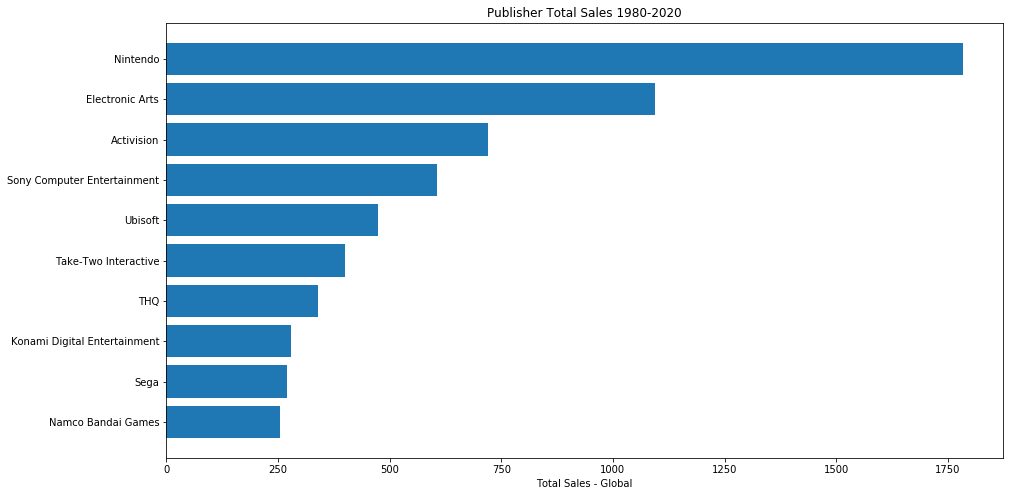

In [473]:
f, ax = plt.subplots(figsize=(15,8))

xaxis = publisher_total_sold["total_sales"]
yaxis = publisher_total_sold["Publisher"]

ax.barh(yaxis, xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_xlabel("Total Sales - Global")
ax.set_title('Publisher Total Sales 1980-2020')

plt.savefig("../Plots/pub_total_sales.png")

plt.show()

In [474]:
mycursor.execute("SELECT Publisher, COUNT(Publisher) as activity FROM vgsales GROUP BY Publisher HAVING COUNT(Publisher) >= 400 ORDER BY activity DESC;")
myresult = mycursor.fetchall()

publisher_activity = pd.DataFrame(myresult)
publisher_activity.columns = ['Publisher', 'activity']
publisher_activity.head(10)

,Publisher,activity
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


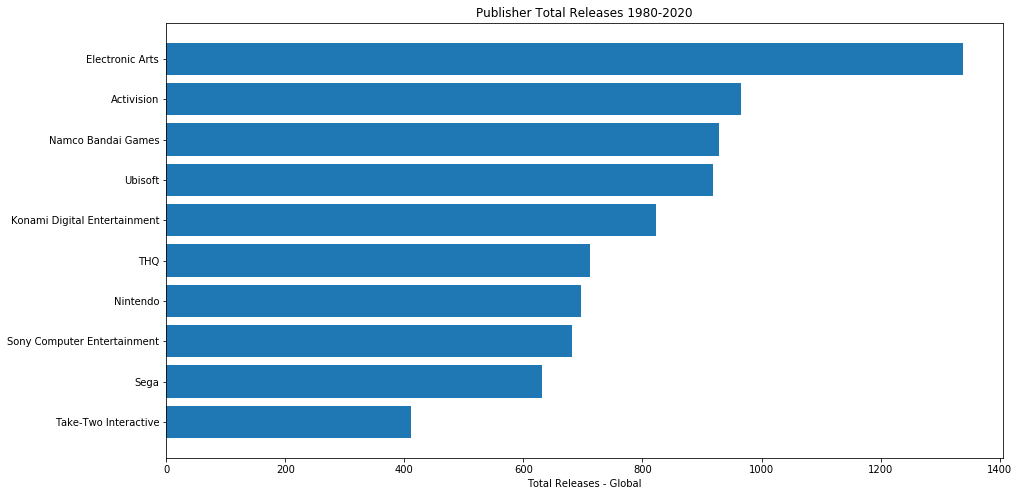

In [475]:
f, ax = plt.subplots(figsize=(15,8))

xaxis = publisher_activity["activity"]
yaxis = publisher_activity["Publisher"]

ax.barh(yaxis, xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_xlabel("Total Releases - Global")
ax.set_title('Publisher Total Releases 1980-2020')

plt.savefig("../Plots/pub_activity.png")

plt.show()

## Analysis: Challenge 2

Nintendo, Electronic Arts, and Activision top the charts as the top three (in order from most to least) publishers that generated the most revenue sales since 1980. 

Electronic Arts, Activision, and Namco Bandai Games (NBG) top the charts as the most active publishers from 1980-2020.

It is important to note that although Nintendo is not as active as other publishers, they generated the most sales out of any other game developer. This means that their video games tend to be more popular, requiring less releases for the amount of sales generated. 

Activision also deserves some credit because (referring to the first dataframe created), Activision is a company that has been actively releasing games since 1980. 

## Challenge 3: According to the dataframe, each entry is Ranked. Which publisher is constantly in the top 100 entries?

This challenge will visualize the game developers that contstantly top the charts in popularity. The "Rank" is already determined by which game generated the most sales. Here, I attempt to find which Publishers are constantly topping the charts, and deserve to be considered by gamers.

In [476]:
mycursor.execute("SELECT `Rank`, Publisher FROM vgsales WHERE `Rank` <= 100;")
myresult = mycursor.fetchall()

publisher_rank = pd.DataFrame(myresult)
publisher_rank.columns = ['Rank', 'Publisher']
publisher_rank.head(20)

,Rank,Publisher
0,1,Nintendo
1,2,Nintendo
2,3,Nintendo
3,4,Nintendo
4,5,Nintendo
5,6,Nintendo
6,7,Nintendo
7,8,Nintendo
8,9,Nintendo
9,10,Nintendo


In [477]:
publisher_rank['Publisher'].value_counts()

Nintendo                       52
Activision                     14
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
SquareSoft                      1
Atari                           1
Bethesda Softworks              1
Sega                            1
Name: Publisher, dtype: int64

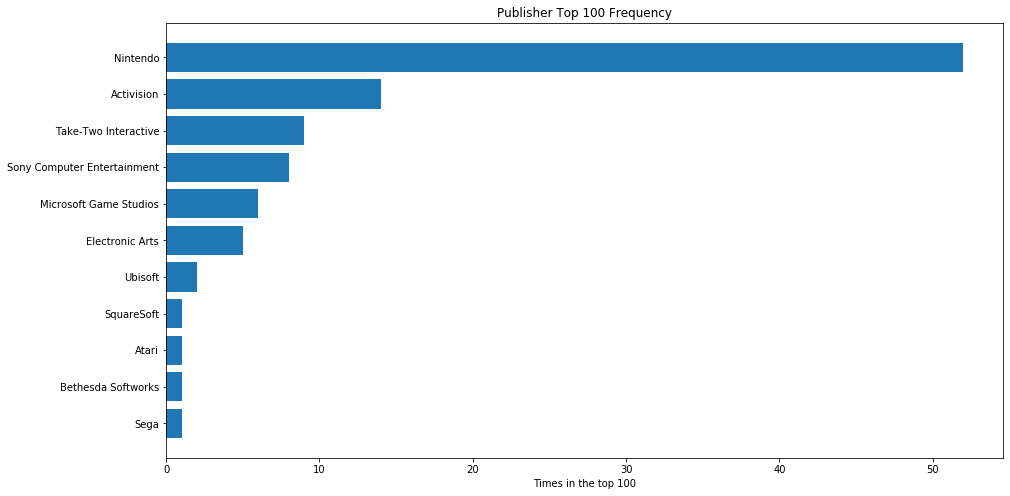

In [478]:
f, ax = plt.subplots(figsize=(15,8))

xaxis = (52, 14, 9, 8, 6, 5, 2, 1 ,1 ,1 ,1)
yaxis = ('Nintendo', 'Activision', 'Take-Two Interactive', 'Sony Computer Entertainment',
        'Microsoft Game Studios', 'Electronic Arts', 'Ubisoft', 'SquareSoft', 'Atari',
        'Bethesda Softworks', 'Sega')

ax.barh(yaxis, xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_xlabel("Times in the top 100")
ax.set_title('Publisher Top 100 Frequency')

plt.savefig("../Plots/pub_100_freq.png")

plt.show()

## Analysis: Challenge 3

According to the dataset, it is apparent that Nintendo leads the game development industry by ranking in the top 100 a total of 52 times. Activision and Take-Two Interactive follow, but are not close to matching the ranking of Nintendo.

## Challenge 4: What percentage do the leading Publishers contribute to the total sales?

Publishers like Activision and Nintendo lead the industry. But it may be helpful to know just how far the other publishers are. I will attempt to display the total amount of sales reported by the Top 10 Publishers.

To do this I would need to: 
1) Establish the top 10 Leading Publishers
2) Find the total of all sales from those 10 publishers
3) Present a Chart that shows just how much of a contribution each leading publisher has.

In [479]:
mycursor.execute("SELECT Publisher, SUM(Global_Sales) as top_ten_sales FROM vgsales GROUP BY Publisher HAVING Publisher = 'Nintendo' OR Publisher = 'Activision' OR Publisher = 'Take-Two Interactive' OR Publisher = 'Sony Computer Entertainment' OR Publisher = 'Microsoft Game Studios' OR Publisher = 'Electronic Arts' OR Publisher = 'Ubisoft' OR Publisher = 'SquareSoft' OR Publisher = 'Atari' OR Publisher = 'Bethesda Softworks' ORDER BY top_ten_sales DESC;")
myresult = mycursor.fetchall()

top_ten = pd.DataFrame(myresult)
top_ten.columns = ['Publisher', 'Top Ten Sales']
top_ten.head(10)

,Publisher,Top Ten Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,Microsoft Game Studios,245.79
7,Atari,146.77
8,Bethesda Softworks,81.53
9,SquareSoft,57.65


In [480]:
top_ten_sum = top_ten['Top Ten Sales'].sum()
top_ten_total_sum = top_ten_sum * 100000
print(top_ten_total_sum)

561108999.999999


In [481]:
mycursor.execute("SELECT SUM(Global_Sales) FROM vgsales;")
myresult = mycursor.fetchall()

global_sum = pd.DataFrame(myresult)
global_sum.columns = ['Global Sum']
global_sum.head(20)

,Global Sum
0,8820.36


In [482]:
global_total_sum = 8820.36 * 100000
print(global_total_sum)

882036000.0


### Please note that the "Sales" is referring to how many copies are sold, and each value is multiplied by 100,000 copies. In other words, the Global Sum is around 882,036,000 and the Top Ten Sum is around 561,109,000

/Users/gianmillare/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


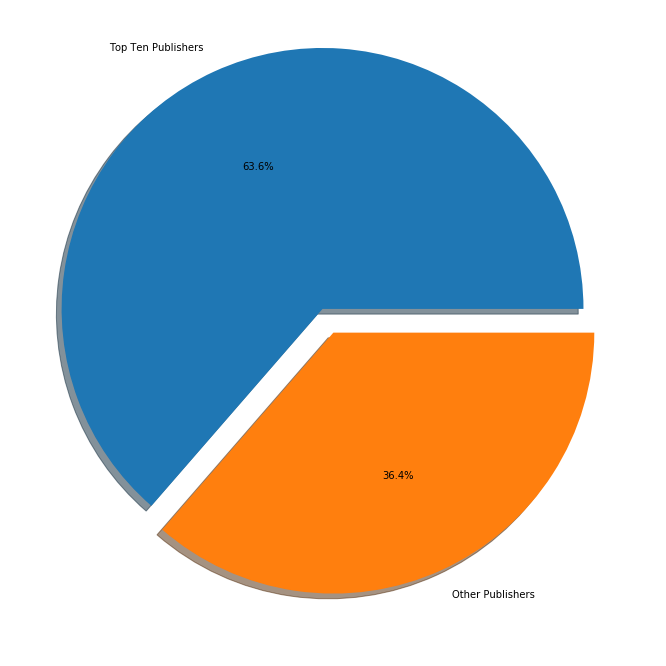

In [483]:
sizes = [top_ten_total_sum], [global_total_sum - top_ten_total_sum]
labels = ['Top Ten Publishers', 'Other Publishers']
explode = (0.1, 0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/top_ten_vs_others.png")

plt.show()

## The top ten publishers accounted for over 63% of all copies sold Globally.

In [484]:
mycursor.execute("SELECT Publisher, SUM(Global_Sales) as top_ten_sales FROM vgsales GROUP BY Publisher HAVING Publisher = 'Nintendo' OR Publisher = 'Activision' OR Publisher = 'Take-Two Interactive' OR Publisher = 'Sony Computer Entertainment' OR Publisher = 'Microsoft Game Studios' OR Publisher = 'Electronic Arts' OR Publisher = 'Ubisoft' OR Publisher = 'SquareSoft' OR Publisher = 'Atari' OR Publisher = 'Bethesda Softworks' ORDER BY top_ten_sales DESC;")
myresult = mycursor.fetchall()

top_ten = pd.DataFrame(myresult)
top_ten.columns = ['Publisher', 'Top Ten Sales']
top_ten.head(10)

,Publisher,Top Ten Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,Microsoft Game Studios,245.79
7,Atari,146.77
8,Bethesda Softworks,81.53
9,SquareSoft,57.65


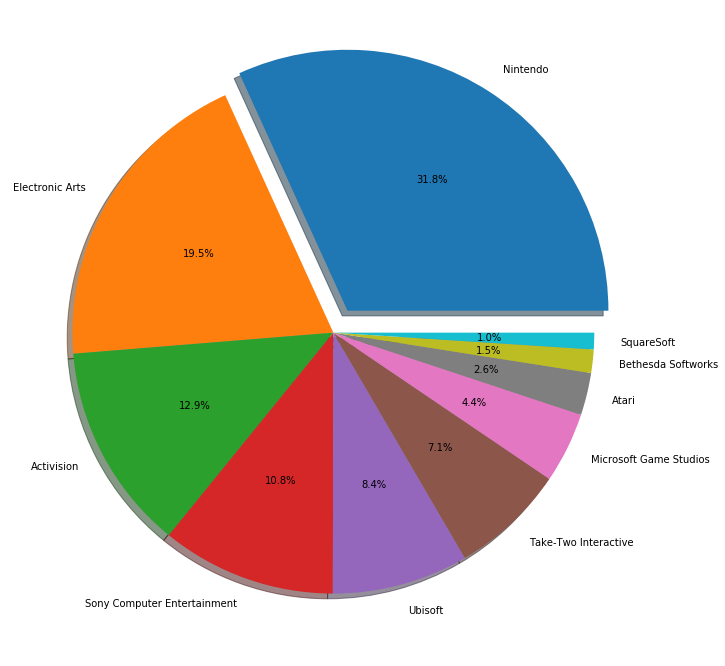

In [485]:
sizes = [1784.43, 1093.39, 721.41, 607.28, 473.54, 399.30, 245.79, 146.77, 81.53, 57.65]
labels = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 
          'Ubisoft', 'Take-Two Interactive', 'Microsoft Game Studios', 'Atari',
         'Bethesda Softworks', 'SquareSoft']
explode = (0.1,0,0,0,0,0,0,0,0,0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/top_ten_vs_self.png")

plt.show()

## Analysis Part 2: Challenge 4

I also wanted to find out just how much each of the top ten Publishers contributed to their aggregate total.  Following the pattern of previously answered challenges, the top three contributors are Nintendo, Electronic Arts, and Activision. 

## Challenge 5: What are the top most popular consoles and how many sales did they contribute to the global total?

Some gamers make purchases based on console rather than brand loyalty. Therefore, by finding out the most popular consoles, a game developer can decide which console should be compatible with their game during launch. 

To accomplish this, I will 1) Determine the top 10 Platforms 2) Find the percentage of the top ten Platforms to the total of all entries, and finally 3) chart each individual contribution to the top ten.

In [486]:
mycursor.execute("SELECT Platform, COUNT(Platform) as Console FROM vgsales GROUP BY Platform ORDER BY Console DESC LIMIT 10;")
myresult = mycursor.fetchall()

top_console = pd.DataFrame(myresult)
top_console.columns = ['Console', 'Count']
top_console.head(10)

,Console,Count
0,DS,2133
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1235
5,PSP,1197
6,PS,1189
7,PC,943
8,GBA,811
9,XB,803


In [487]:
dataframe['Name'].count()

16327

In [488]:
top_console_sum = top_console['Count'].sum()
top_console_sum

13032

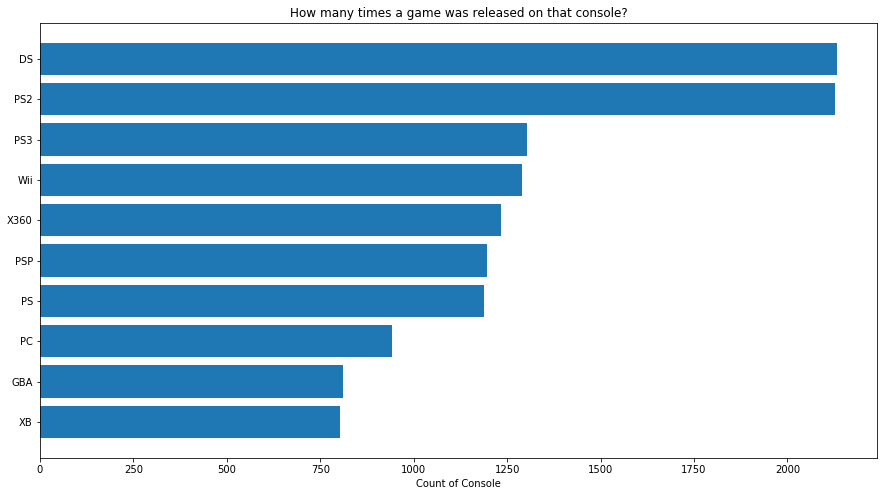

In [489]:
f, ax = plt.subplots(figsize=(15,8))

xaxis = top_console['Count']
yaxis = top_console['Console']

ax.barh(yaxis, xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_xlabel("Count of Console")
ax.set_title('How many times a game was released on that console?')

plt.savefig("../Plots/console_popularity.png")

plt.show()

## According to the above graph, more video games were released on the DS than any other platform. However, having a video game release on a certain console does not guarantee success.

In other words, I need to find the aggregate total of games sold sorted by Console, instead of judging the success of a console based on the number of games launched on that console.

In [490]:
mycursor.execute("SELECT Platform, SUM(Global_Sales) as console_sum FROM vgsales GROUP BY Platform ORDER BY console_sum DESC LIMIT 10;")
myresult = mycursor.fetchall()

top_ten_console = pd.DataFrame(myresult)
top_ten_console.columns = ['Platform', 'Total per Console']
top_ten_console.head(10)

,Platform,Total per Console
0,PS2,1233.46
1,X360,969.61
2,PS3,949.35
3,Wii,909.81
4,DS,818.96
5,PS,727.39
6,GBA,313.56
7,PSP,291.71
8,PS4,278.10
9,PC,255.05


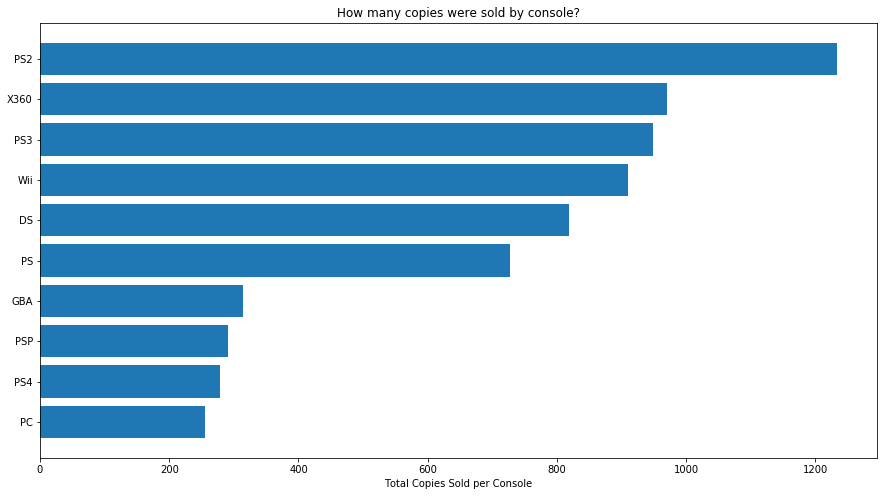

In [491]:
f, ax = plt.subplots(figsize=(15,8))

xaxis = top_ten_console['Total per Console']
yaxis = top_ten_console['Platform']

ax.barh(yaxis, xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_xlabel("Total Copies Sold per Console")
ax.set_title('How many copies were sold by console?')

plt.savefig("../Plots/console_aggregate.png")

plt.show()

In [492]:
top_ten_total_sum = top_ten_console['Total per Console'].sum()
top_ten_total_sum

6746.999999999957

In [493]:
mycursor.execute('SELECT Platform, SUM(Global_Sales) as console_sum FROM vgsales GROUP BY Platform ORDER BY console_sum DESC;')
myresult = mycursor.fetchall()

global_total_sum = pd.DataFrame(myresult)
global_total_sum.columns = ['Platform', 'Console Total']
global_total_sum.head()

,Platform,Console Total
0,PS2,1233.46
1,X360,969.61
2,PS3,949.35
3,Wii,909.81
4,DS,818.96


In [494]:
global_total_sum = global_total_sum['Console Total'].sum()
global_total_sum

8820.359999999962

### As indicated by the above, although more games were launched on the DS, the PlayStation 2 sold more copies of games than any other console.

/Users/gianmillare/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


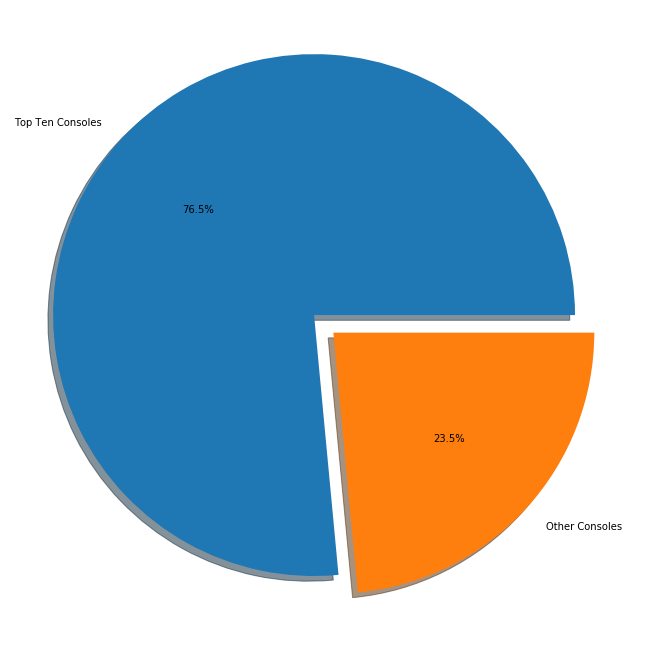

In [495]:
sizes = [top_ten_total_sum], [global_total_sum - top_ten_total_sum]
labels = ['Top Ten Consoles', 'Other Consoles']
explode = (0.1, 0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/top_ten_con_vs_others.png")

plt.show()

In [496]:
mycursor.execute("SELECT Platform, SUM(Global_Sales) as console_sum FROM vgsales GROUP BY Platform ORDER BY console_sum DESC LIMIT 10;")
myresult = mycursor.fetchall()

top_ten_console = pd.DataFrame(myresult)
top_ten_console.columns = ['Platform', 'Total per Console']
top_ten_console.head(10)

,Platform,Total per Console
0,PS2,1233.46
1,X360,969.61
2,PS3,949.35
3,Wii,909.81
4,DS,818.96
5,PS,727.39
6,GBA,313.56
7,PSP,291.71
8,PS4,278.10
9,PC,255.05


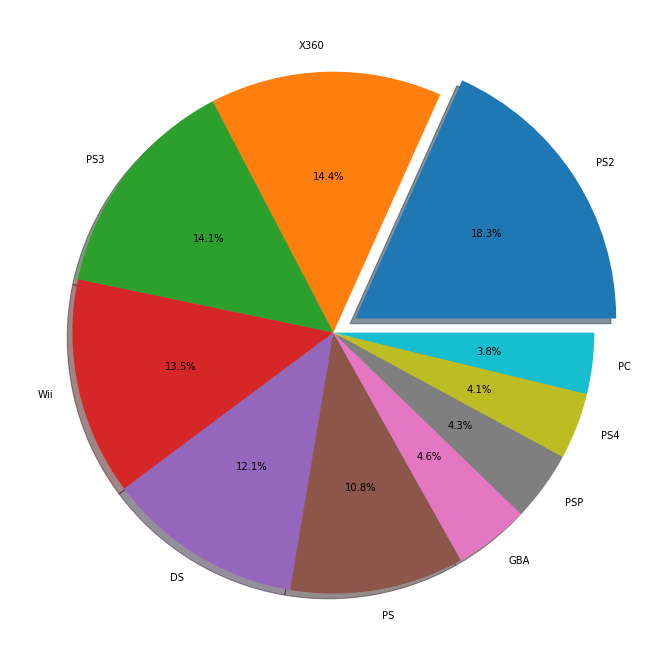

In [497]:
sizes = [1233.46, 969.61, 949.35, 909.81, 818.96, 727.39, 313.56, 291.71, 278.10, 255.05]
labels = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP','PS4', 'PC']
explode = (0.1,0,0,0,0,0,0,0,0,0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/top_ten_con_vs_self.png")

plt.show()

## Analysis: Challenge 5

Although more video game copies were released on the DS, the Console that had more success with copies sold was the PlayStation 2, the Xbox 360, and the Playstation 3.

One thing to note is that the four consoles mentioned above are currently considered outdated as more recent models of those consoles are now released. I would advise a client to launch a video game based on the console's Publisher. Indicated below:

In [498]:
mycursor.execute("SELECT DISTINCT Publisher, Platform FROM vgsales WHERE Platform LIKE 'PS2' OR Platform LIKE 'DS' OR Platform LIKE 'X360';")
myresult = mycursor.fetchall()

platform_to_pub = pd.DataFrame(myresult)
platform_to_pub.columns = ['Publisher', 'Console']
platform_to_pub.head()

,Publisher,Console
0,Nintendo,DS
1,Microsoft Game Studios,X360
2,Take-Two Interactive,PS2
3,Take-Two Interactive,X360
4,Sony Computer Entertainment,PS2


## Challenge 6: What is the most popular Genre in North America? Europe? Japan?

Some game developers may be limited to their specific regions, or would like to target the audience of a specific region. I'll figure out what genre is most popular in each of these regions

In [499]:
mycursor.execute('SELECT Genre, SUM(NA_Sales) as total_sales FROM vgsales GROUP BY Genre ORDER BY total_sales DESC;')
myresult = mycursor.fetchall()

na_sales = pd.DataFrame(myresult)
na_sales.columns = ['Genre', 'NA Sales']
na_sales.head(20)

,Genre,NA Sales
0,Action,861.80
1,Sports,670.09
2,Shooter,575.16
3,Platform,445.99
4,Misc,402.48
5,Racing,356.93
6,Role-Playing,326.50
7,Fighting,220.74
8,Simulation,181.78
9,Puzzle,122.01


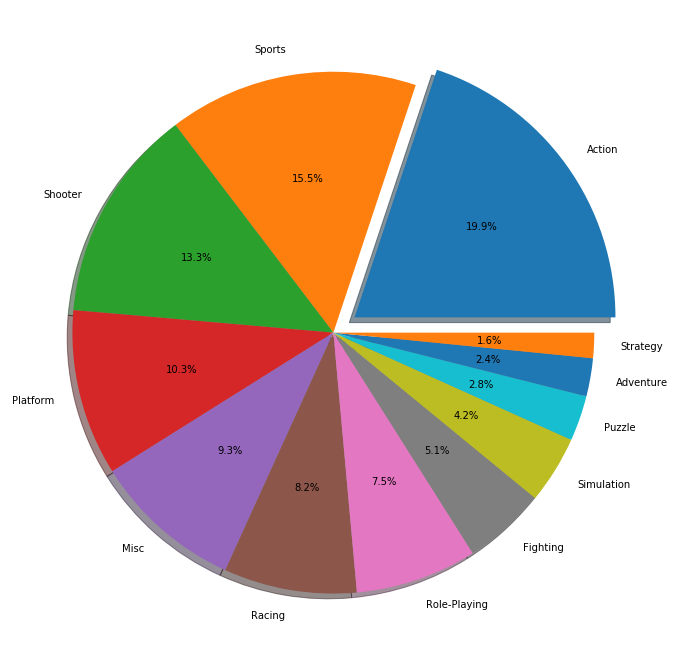

In [500]:
sizes = [861.80, 670.09, 575.16, 445.99, 402.48, 356.93, 326.50, 220.74, 181.78, 122.01, 102.06, 67.89]
labels = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing', 'Fighting','Simulation', 
          'Puzzle', 'Adventure', 'Strategy']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/na_sales.png")

plt.show()

## NA_sales indicate the most popular genre in North America is Action

In [501]:
mycursor.execute('SELECT Genre, SUM(EU_Sales) as total_sales FROM vgsales GROUP BY Genre ORDER BY total_sales DESC;')
myresult = mycursor.fetchall()

eu_sales = pd.DataFrame(myresult)
eu_sales.columns = ['Genre', 'EU Sales']
eu_sales.head(20)

,Genre,EU Sales
0,Action,516.48
1,Sports,371.34
2,Shooter,310.45
3,Racing,236.32
4,Misc,213.82
5,Platform,200.67
6,Role-Playing,187.58
7,Simulation,113.20
8,Fighting,100.00
9,Adventure,63.79


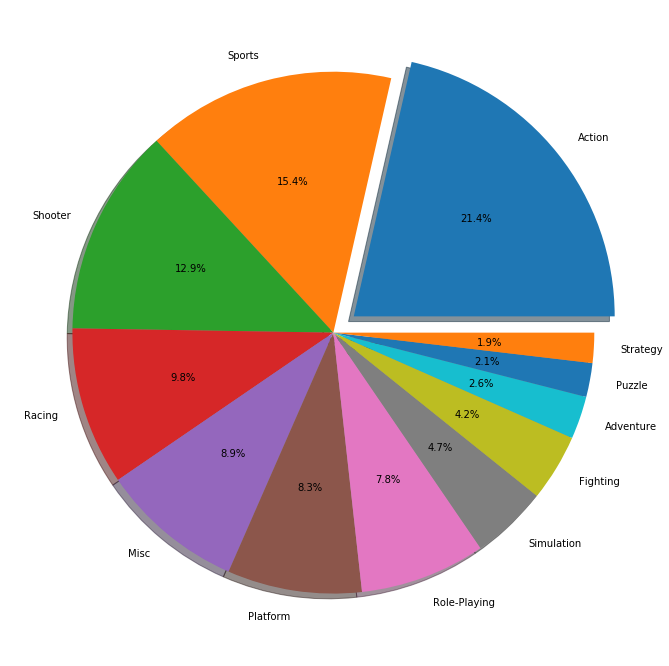

In [502]:
sizes = [516.48, 371.34, 310.45, 236.32, 213.82, 200.67, 187.58, 113.20, 100.00, 63.79, 50.53, 44.94]
labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Misc', 'Platform', 'Role-Playing', 'Simulation','Fighting', 
          'Adventure', 'Puzzle', 'Strategy']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/eu_sales.png")

plt.show()

## EU_sales indicate the most popular genre in Europe is Action

In [503]:
mycursor.execute('SELECT Genre, SUM(JP_Sales) as total_sales FROM vgsales GROUP BY Genre ORDER BY total_sales DESC;')
myresult = mycursor.fetchall()

jp_sales = pd.DataFrame(myresult)
jp_sales.columns = ['Genre', 'JP Sales']
jp_sales.head(20)

,Genre,JP Sales
0,Role-Playing,350.29
1,Action,158.66
2,Sports,134.76
3,Platform,130.65
4,Misc,106.67
5,Fighting,87.15
6,Simulation,63.54
7,Puzzle,56.68
8,Racing,56.61
9,Adventure,52.01


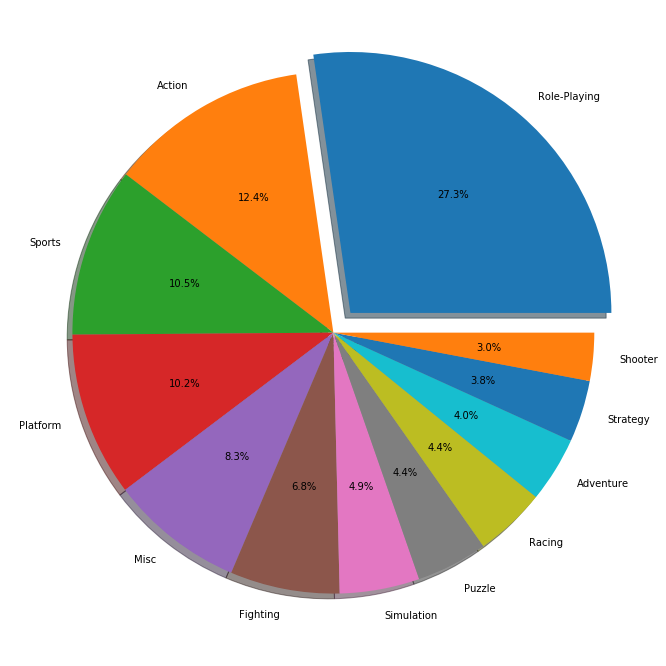

In [504]:
sizes = [350.29, 158.66, 134.76, 130.65, 106.672, 87.15, 63.54, 56.68, 56.61, 52.01, 49.10, 38.18]
labels = ['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc', 'Fighting', 'Simulation', 'Puzzle','Racing', 
          'Adventure', 'Strategy', 'Shooter']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0)

f, ax = plt.subplots(figsize=(12,12))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

plt.savefig("../Plots/jp_sales.png")

plt.show()

## JP_sales indicate the most popular genre in Japan is Role-Playing

## Analysis: Challenge 6

The most popular Genre in North America and Europe is Action-type of games. The most popular Genre in Japan is Role-Playing games. 

As a bonus, I will also visualize an aggregate total for the three regions

In [505]:
na_sales_sum = na_sales['NA Sales'].sum()
eu_sales_sum = eu_sales['EU Sales'].sum()
jp_sales_sum = jp_sales['JP Sales'].sum()

print(str(na_sales_sum) + ', ' + str(eu_sales_sum) + ', ' + str(jp_sales_sum))

4333.42999999998, 2409.1199999999817, 1284.3000000000002


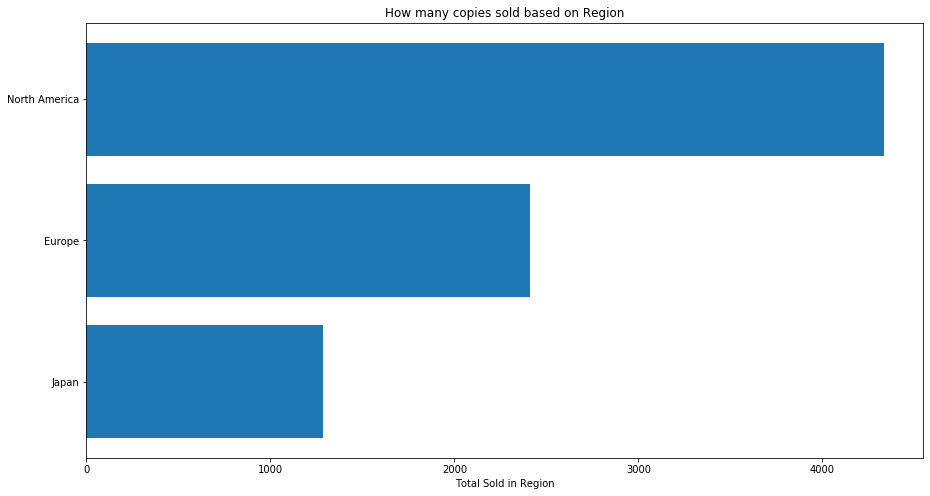

In [506]:
f, ax = plt.subplots(figsize=(15,8))

xaxis = [na_sales_sum, eu_sales_sum, jp_sales_sum]
yaxis = ['North America', 'Europe', 'Japan']

ax.barh(yaxis, xaxis)
ax.set_yticklabels(yaxis)
ax.invert_yaxis()
ax.set_xlabel("Total Sold in Region")
ax.set_title('How many copies sold based on Region')

plt.savefig("../Plots/region_plot.png")

plt.show()

## Challenge 7: Show the change in sales for each region

As a reference, it may be helpful to display the change in sales within each region from 1980-2020. 

In [507]:
mycursor.execute("SELECT Year, NA_Sales, EU_Sales, JP_Sales FROM vgsales ORDER BY Year;")
myresult = mycursor.fetchall()

region_df = pd.DataFrame(myresult)
region_df.columns = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales']
region_df.head(10)

,Year,NA_Sales,EU_Sales,JP_Sales
0,1980,0.25,0.02,0.0
1,1980,0.22,0.01,0.0
2,1980,4.00,0.26,0.0
3,1980,2.56,0.17,0.0
4,1980,1.07,0.07,0.0
5,1980,0.99,0.05,0.0
6,1980,0.72,0.04,0.0
7,1980,0.46,0.03,0.0
8,1980,0.32,0.02,0.0
9,1981,4.21,0.24,0.0


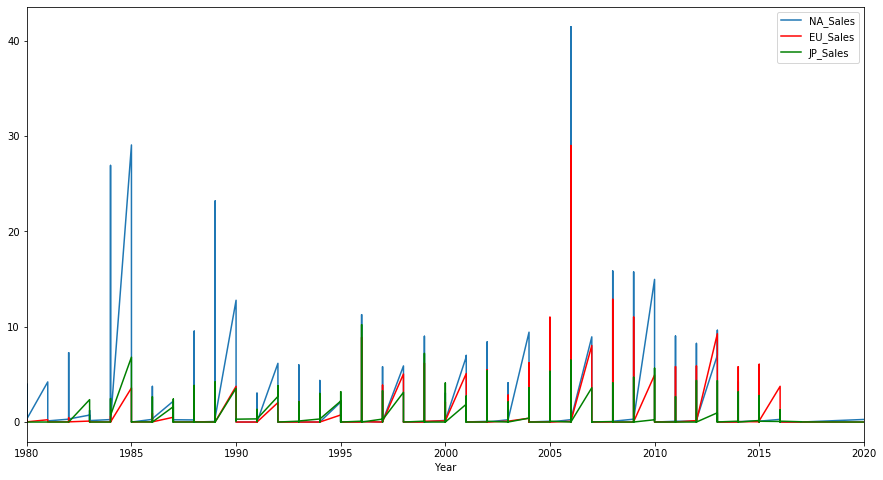

In [508]:
f, ax = plt.subplots(figsize=(15,8))

region_df.plot(kind='line', x='Year', y='NA_Sales', ax=ax)
region_df.plot(kind='line', x='Year', y='EU_Sales', color='red',ax=ax)
region_df.plot(kind='line', x='Year', y='JP_Sales', color='green', ax=ax)

plt.savefig("../Plots/region_change.png")

plt.show()

## Analysis: Challenge 7

The reason I wanted to show the timeline of sales for each region is to see if there are any relationships between a regions success. 

I hypothesized that the frequency of sales for each region would be relatively similar because, usually, when a video game is released, the most popular video games are released worldwide. This line plot shows that as one region experiences a spike in sales, the spike occurs in other regions as well (with the exception of the early 1980's). 

# Finish

Thank you for reading through my analysis! This was an analysis project with 2 main objectives: (1) analyze the data trends of video game sales to an extent that would be helpful to gaming companies, and (2) showcase and hone my Python and SQL skills to potential employers / clients. Please consider checking out more of my projects on my portfolio -->

# www.gianmillare.io